CSC-4903 Quantum Special Topics Circuit Cutting Project
Members:

Samuel Hartmann

Alexis Ouellette

Nathan Tomlin

Citation for Qiskit Demonstration of: Wire Cutting Phrased as a Two-Qubit Move: Instruction

https://qiskit.github.io/qiskit-addon-cutting/

https://qiskit.github.io/qiskit-addon-cutting/tutorials/03_wire_cutting_via_move_instruction.html

@misc{qiskit-addon-cutting,
  author = {
    Agata M. Bra\'{n}czyk'
    and Almudena {Carrera Vazquez}
    and Daniel J. Egger
    and Bryce Fuller
    and Julien Gacon
    and James R. Garrison
    and Jennifer R. Glick
    and Caleb Johnson
    and Saasha Joshi
    and Edwin Pednault
    and C. D. Pemmaraju
    and Pedro Rivero
    and Ibrahim Shehzad
    and Stefan Woerner
  },
  title = {{Qiskit addon: circuit cutting}},
  howpublished = {\url{https://github.com/Qiskit/qiskit-addon-cutting}},
  year = {2024},
  doi = {10.5281/zenodo.7987997}
}

In [ ]:
#Pip installs
!pip install qiskit-ibm-runtime
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install qiskit_addon_cutting

#initialization
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint

# importing Qiskit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import partial_trace

# import basic plot tools
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

#import Real Quantum Interface
from qiskit_ibm_runtime import SamplerV2, Batch
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.2/353.2 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.

In [ ]:
#Circuit Cutting Imports
from qiskit_addon_cutting import generate_cutting_experiments
from qiskit.quantum_info import SparsePauliOp
from qiskit_addon_cutting.instructions import Move
from qiskit_addon_cutting import partition_problem
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit_addon_cutting import reconstruct_expectation_values
from qiskit_aer.primitives import EstimatorV2

#What is Quantum Circuit Cutting?

In a nutshell, quantum circuit cutting is the process of taking a large quantum circuit and "cutting" it into smaller subcircuits. The reason we do this is some circuits may be too large and too computationally intensive to be ran on  modern quantum computers (due to their limitations in qubits). So, first we begin by cutting the original circuit into smaller subcircuits, which are smaller than the original circuit and as a result are able to be ran on modern hardware. Once these subcircuits have been created, we can then execute them independently on either the same quantum computer, or multiple different quantum computers at the same time. Once we have the results for each subcircuit, we can reassemble them to get some estimation of what value the original "large" circuit would have produced, had it been able to be ran.

#Why do we need Circuit Cutting?

Quantum Circuit Cutting aims to solve the modern-day problem of not having a quantum computer that is powerful enough to run certain quantum circuits or quantum algorithms. Continued research and advancement into this subfield could, theoretically, allow us to be able to enhance the capabilities of quantum algorithms for things such as machine learning and cryptography. Take Shor's algorithm, for example. Currently, we are only able to run the algorithm on very small numbers. Should this subfield advance to a point where we are able to use it without much error, then we could theoretically use Shor's algorithm to its full potential, allowing us to achieve breakthrough enhancements in computation, such as breaking RSA encryption.

#Part 1: Defining the Cicuit

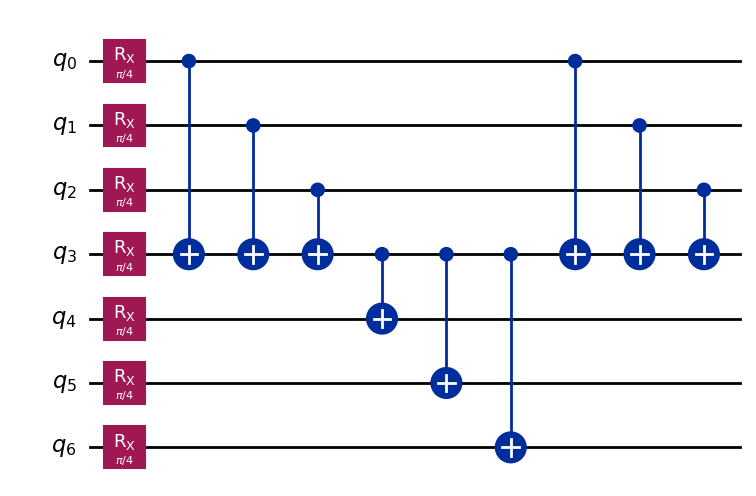

In [ ]:
#Define 7 qubit circuit
qc_0 = QuantumCircuit(7)
for i in range(7):
    qc_0.rx(np.pi / 4, i)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)
qc_0.cx(3, 4)
qc_0.cx(3, 5)
qc_0.cx(3, 6)
qc_0.cx(0, 3)
qc_0.cx(1, 3)
qc_0.cx(2, 3)
qc_0.draw("mpl")

First we define a seven qubit state that we will be applying quantum wire cutting to. Wire cutting is different from gate cutting as it introduces a swap operation to transfer the state of the first qubit onto the second and back. Gate cutting relies on an existing pair of gate to split while wire cutting relies on the presence of an ancillary qubit to transfer the state from one circuit to another and back.

#Section: Visualize circuit on Aer Simulator

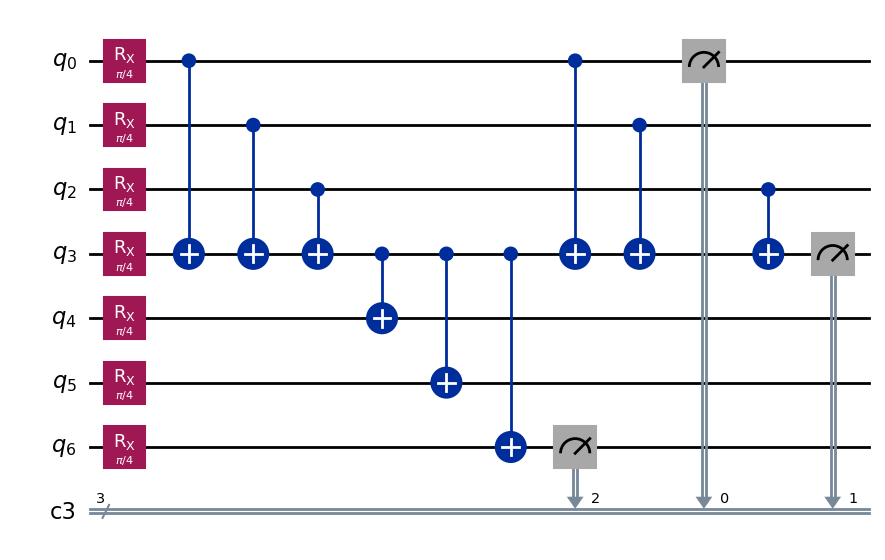

In [ ]:
#Copy and add measurements
qc_c = qc_0.copy()
qc_c.add_register(ClassicalRegister(3))
qc_c.measure([0,3,6],[0,1,2])
qc_c.draw("mpl")

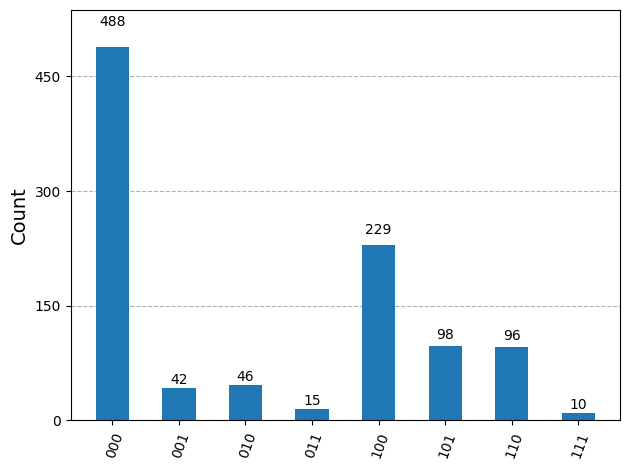

In [ ]:
#Run Aer Sim and visualize
aer_sim = Aer.get_backend('aer_simulator')
copy_circuit = transpile(qc_c, aer_sim)
copy_r = aer_sim.run(copy_circuit).result()
copy_a = copy_r.get_counts()
plot_histogram(copy_a)

Here we visualize the output based on the 3 pauli observables listed below.

#Part 2: Cutting the Circuit

In [ ]:
#Define Observables
observable = SparsePauliOp(["ZIIIIII", "IIIZIII", "IIIIIIZ"])

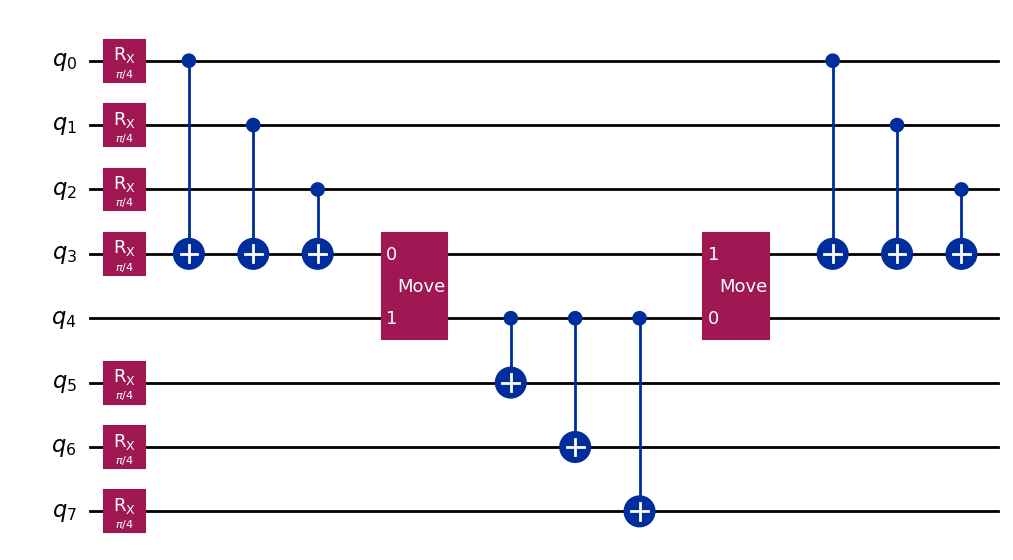

In [ ]:
#Create 8 qubit circuit for cutting into 4s based on given circuit
qc_1 = QuantumCircuit(8)
for i in [*range(4), *range(5, 8)]:
    qc_1.rx(np.pi / 4, i)
qc_1.cx(0, 3)
qc_1.cx(1, 3)
qc_1.cx(2, 3)
qc_1.append(Move(), [3, 4])
qc_1.cx(4, 5)
qc_1.cx(4, 6)
qc_1.cx(4, 7)
qc_1.append(Move(), [4, 3])
qc_1.cx(0, 3)
qc_1.cx(1, 3)
qc_1.cx(2, 3)

qc_1.draw("mpl")

Here we see after inserting the pair of move instructions that we have had to add an 8th ancillary qubit purely to facilitate the swap. The way these move gates work is they act as a random init gate overriding the wire on 1 with the incoming state on 0. So here the q3 state after the 3 CNOT gates is copied onto q4 and then used to activate the 3 CNOT gates and then the resulting state is transferred back to q3. This process relies on QuasiProbability Distribution to swap partial reads of the larger function on several decomposed circuits and then probabilistically combine then to closely approximate the output of the larger circuit.

In [ ]:
#Expanded Observables
observable_expanded = SparsePauliOp(["ZIIIIIII", "IIIIZIII", "IIIIIIIZ"])

In [ ]:
#Partition Circuit
partitioned_problem = partition_problem(
    circuit=qc_1, partition_labels="AAAABBBB", observables=observable_expanded.paulis
)
subcircuits = partitioned_problem.subcircuits
subobservables = partitioned_problem.subobservables
bases = partitioned_problem.bases

subobservables

{'A': PauliList(['IIII', 'ZIII', 'IIIZ']),
 'B': PauliList(['ZIII', 'IIII', 'IIII'])}

#Draw Split Circuit

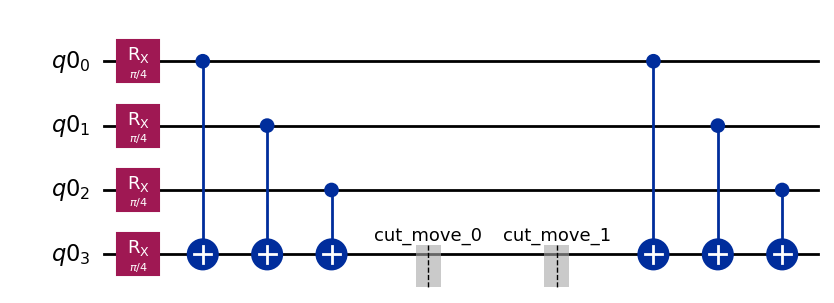

In [ ]:
#Draw Subcircuit "A"
subcircuits["A"].draw("mpl")

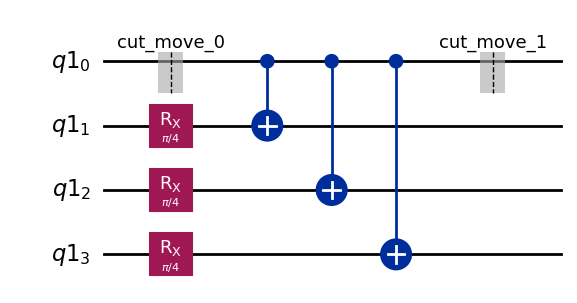

In [ ]:
#Draw Subcircuit "B"
subcircuits["B"].draw("mpl")

Comparing the two circuits we read circuit "A" on qubits 12.0 and 12.3 while circuit "B" is only read on qubit 13.3. These correspond to the original circuit being read on q0, q3, and q6. The circuit also has to meaure 3 dummy subcircuits as a limitation of current circuit compilation techniques.

#Part 3: Calculate overhead and simulate circuit

In [ ]:
print(f"Sampling overhead: {np.prod([basis.overhead for basis in bases])}")

Sampling overhead: 256.0


Each Move gate caries an overhead penalty of 4^2 = 16 so the two gates together are 16^2 = 256. So to get a similar degree of accuracy to the original circuit we have to perform 256 more pulses as compared to the original circuit. This highlights why we simply can't fold a very large qubit circuit onto smaller ones with circuit cutting. There is a further limitation imposed by current transpilers that restricts the use of registers and measurement devices of output so at present we can only get an expected output from the reconstructed circuit.

#Section: Run on Simulator

In [ ]:
#Generate Experiments to send by Batch Manager
subexperiments, coefficients = generate_cutting_experiments(
    circuits=subcircuits, observables=subobservables, num_samples=np.inf
)

#setup backend simulator
backendf = FakeManilaV2()

# Transpile the subexperiments to ISA circuit with simulator passmanager
pass_managerf = generate_preset_pass_manager(optimization_level=1, backend=backendf)
isa_subexperiments = {
    label: pass_managerf.run(partition_subexpts)
    for label, partition_subexpts in subexperiments.items()
}

In [ ]:
# Submit each partition's subexperiments to the Qiskit Runtime Sampler
# primitive, in a single batch so that the jobs will run back-to-back.
with Batch(backend=backendf) as batch:
    sampler = SamplerV2(mode=batch)
    jobs = {
        label: sampler.run(subsystem_subexpts, shots=2**12)
        for label, subsystem_subexpts in isa_subexperiments.items()
    }

# Retrieve results
results = {label: job.result() for label, job in jobs.items()}

In [ ]:
#Get terms from expectation values and results from experiments
reconstructed_expval_terms = reconstruct_expectation_values(
    results,
    coefficients,
    subobservables,
)

#Generate expected value from quantum simulator
reconstructed_expval = np.dot(reconstructed_expval_terms, observable.coeffs)

#Section: Run on Real Quantum Computer

In [ ]:
#Setup Service -Note Sunset 07/01/2025 - July 1, 2025
ibm_token = "71cb8a4b1acfbe34d74a31e7642b10dbae38666931fc48d002fcade1e892882ce7b5a414629381cda3faf646de71f1e3df9706d9e80d2fa49396687aa44cb702"
QiskitRuntimeService.save_account(channel="ibm_quantum", token=str(ibm_token), overwrite=True)
service = QiskitRuntimeService(channel="ibm_quantum")

# Select the least busy operational backend and print name
backends = service.backends(operational=True, min_num_qubits=qc_0.num_qubits)
backend1 = min(backends, key=lambda b: b.status().pending_jobs)
print(f"Using backend: {backend1.name}")

#Generate pass manager for real quantum computer
pm = generate_preset_pass_manager(backend=backend1, optimization_level=1)

<ipython-input-25-4a08f8bd1a49>:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum")


Using backend: ibm_sherbrooke


In [ ]:
#Setup isa circuits with Real QC PassManager
isa_subexperiments = {
    label: pm.run(partition_subexpts)
    for label, partition_subexpts in subexperiments.items()
}

#Send Job with batch command of 500 to reduce errors
#500 chosen to reduce compute time to 24s from 2:40 for 4096
with Batch(backend=backend1) as batch:
    sampler = SamplerV2(mode=batch)
    jobs = {
        label: sampler.run(subsystem_subexpts, shots=500)
        for label, subsystem_subexpts in isa_subexperiments.items()
    }

# Retrieve results from real quantum computer
resultsr = {label: job.result() for label, job in jobs.items()}

In [ ]:
#Reconstruct Real Quantum Computer
reconstructed_expval_terms2 = reconstruct_expectation_values(
    resultsr,
    coefficients,
    subobservables,
)

#Calculate expected value return from circuit
reconstructed_expvalr = np.dot(reconstructed_expval_terms2, observable.coeffs)

#Section: Results

In [ ]:
#Setup estimator and run to get correct expected values
estimator = EstimatorV2()
exact_expval = estimator.run([(qc_0, observable)]).result()[0].data.evs

#Print results of experiments and compare to expected
print(f"Exact expectation value: {np.round(exact_expval, 8)}")
print(f"Reconstructed expectation value: {np.real(np.round(reconstructed_expval, 8))}")
print(f"Reconstructed real quantum computer expectation value: {np.real(np.round(reconstructed_expvalr, 8))}")
print(f"Error in real quantum computer estimation: {np.real(np.round(reconstructed_expvalr-exact_expval, 8))}")
print(
    f"Relative error in real quantum computer estimation: {np.real(np.round((reconstructed_expvalr-exact_expval) / exact_expval, 8))}"
)
print(f"Error in simulator estimation: {np.real(np.round(reconstructed_expval-exact_expval, 8))}")
print(
    f"Relative error in simulator estimation: {np.real(np.round((reconstructed_expval-exact_expval) / exact_expval, 8))}"
)

Exact expectation value: 1.59099026
Reconstructed expectation value: 1.39583325
Reconstructed real quantum computer expectation value: 1.3257
Error in real quantum computer estimation: -0.26529026
Relative error in real quantum computer estimation: -0.16674537
Error in simulator estimation: -0.195157
Relative error in simulator estimation: -0.12266386


# Conclusion:

*   Quantum circuit cutting enables the simulation of large quantum circuits by splitting them into smaller, more manageable subcircuits that can run on limited hardware.
*   Our experiment showed that the reconstructed expectation values are more accurate on simulators, but less accurate on real quantum computers due to noise.
*   Despite these challenges, circuit cutting remains a promising strategy for scaling quantum computers, especially as hardware improves and noise mitigation techniques advance.



